In [13]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn. datasets import make_regression

%matplotlib inline

In [14]:
data1, target =  datasets.make_regression(1000, 2)
data1[:,0] = data1[:,0]*10

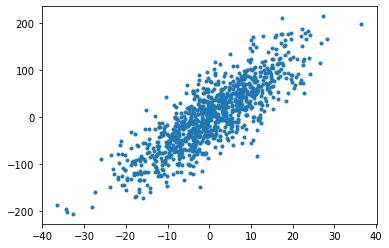

In [15]:
plt.plot(data1[:,0], target, '.')

In [16]:
data1[1].min(), data1[1].max()

(-0.16364445520185794, 22.71881538690717)

In [17]:
data1[2].min(), data1[2].max()

(-1.5787871626189254, -0.4031315527254907)

In [18]:
X_norm = data1.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[11.05714367, -0.85900466],
       [22.71881539, -0.16364446],
       [-1.57878716, -0.40313155],
       ...,
       [-2.39611657, -1.38981437],
       [12.40673207, -0.67982199],
       [ 4.90042955, -0.62141312]])

In [19]:
X_norm[1] = (data1[1] - data1[1].min()) / (data1[1].max() - data1[1].min())
X_norm

array([[11.05714367, -0.85900466],
       [ 1.        ,  0.        ],
       [-1.57878716, -0.40313155],
       ...,
       [-2.39611657, -1.38981437],
       [12.40673207, -0.67982199],
       [ 4.90042955, -0.62141312]])

In [20]:
X_norm[2] = (data1[2] - data1[2].min()) / (data1[2].max() - data1[2].min())
X_norm

array([[11.05714367, -0.85900466],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       ...,
       [-2.39611657, -1.38981437],
       [12.40673207, -0.67982199],
       [ 4.90042955, -0.62141312]])

In [22]:
X_st = data1.copy().astype(np.float64)
X1_mean = data1[1].mean()
X1_std = data1[1].std()
print(X1_mean, X1_std)

11.277585465852656 11.441229921054514


In [23]:
X_st[1] = (data1[1] - X1_mean) / X1_std
X_st

array([[11.05714367, -0.85900466],
       [ 1.        , -1.        ],
       [-1.57878716, -0.40313155],
       ...,
       [-2.39611657, -1.38981437],
       [12.40673207, -0.67982199],
       [ 4.90042955, -0.62141312]])

In [24]:
def calc_std_fit(data1):
    res = (data1 - data1.mean()) / data1.std()
    return res

In [25]:
X_st[2] = calc_std_fit(data1[2])

In [26]:
X_st[3] = calc_std_fit(data1[3])
X_st

array([[11.05714367, -0.85900466],
       [ 1.        , -1.        ],
       [-1.        ,  1.        ],
       ...,
       [-2.39611657, -1.38981437],
       [12.40673207, -0.67982199],
       [ 4.90042955, -0.62141312]])

In [27]:
means = np.mean(data1, axis=0)
stds = np.std(data1, axis=0)
data = data1.copy() 
for i in range(data1.shape[0]):
    for j in range(data1.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [28]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

In [29]:
data1_test, target_test = datasets.make_regression(1000, 2) 
data1_test[:,0] = data1_test[:,0]*10
data_test = data1_test.copy() 
for i in range(data1_test.shape[0]):
    for j in range(data1_test.shape[1]):
        data_test[i][j] = (data_test[i][j] - means[j])/stds[j]

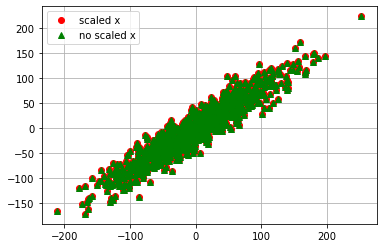

In [30]:
c_lr1 = LinearRegression().fit(data1,target)
c_lr = LinearRegression().fit(data,target)

y1 = c_lr1.predict(data1_test[:1000,:])
y = c_lr.predict(data_test[:1000,:])

plt.plot(y,target_test[:1000],'or', label = 'scaled x')
plt.plot(y1,target_test[:1000],'^g', label = 'no scaled x')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
e1 = np.mean(np.abs(y-target_test))
e = np.mean(np.abs(y1-target_test))
e,e1

(18.8421245660121, 18.84212456601212)

In [32]:
c_lr1.coef_, c_lr.coef_

(array([ 5.72001224, 39.15768543]), array([58.78171515, 39.61105934]))

In [33]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [34]:
def model(data1, target, iterations, alpha=1e-4):
    W = np.random.randn(data1.shape[0])
    n = data1.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mserror(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [35]:
model(X_st, target, iterations=0, alpha=1e-2)

array([-3.66237533e-01, -1.48918417e-01,  1.81698862e+00,  6.66525391e-01,
        1.52375883e+00,  1.10145270e+00, -6.37893957e-01, -1.41204673e-02,
        1.52233410e+00,  4.20993192e-01, -5.36119988e-01, -5.58730639e-01,
        3.25170337e-01,  4.24278688e-01,  1.24899658e+00, -5.47193512e-02,
       -2.57365600e-01, -1.84461696e-01, -6.90123349e-01,  1.44563507e+00,
        2.16524079e+00,  5.17036536e-01, -1.64966221e-01,  1.77489883e-01,
       -9.77055845e-01,  4.31913489e-02, -1.10368438e+00,  3.17996929e-01,
        4.12498547e-02,  4.67227994e-01, -9.49777218e-01, -3.62207629e-01,
        1.07913919e+00, -1.54718638e+00,  2.54379557e-01,  1.32909480e+00,
        4.08781564e-01, -7.44395748e-01,  5.26437388e-01, -1.53255244e+00,
        4.68777973e-01,  2.33628620e-02, -1.96089649e+00, -7.95752996e-01,
       -4.47373931e-01, -1.59114033e+00,  6.66282474e-01,  6.79915857e-01,
       -3.12308673e-01, -1.95189709e-04,  1.39456325e+00,  5.06833005e-02,
       -1.23254355e+00,  

In [37]:
w = np.random.randn(2) 
w_list = [w.copy()]
errors = []
eta = 0.15
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.01 
np.random.seed(1234)
Q = [0]  
while weight_dist > min_weight_dist and iter_num < max_iter:
    
   
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 6.0643


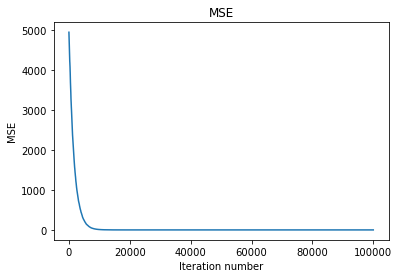

In [41]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

In [39]:
def model_reg2(data1, target, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(data1.shape[0])
    n = data1.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, data1)
        err = mserror(target, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - target), data1.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [40]:
model_reg2(X_st, target, iterations=0, alpha=1e-2, lambda_=1e-4)

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  